이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [56]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


### 결측치 확인

In [59]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### 상관관계 분석

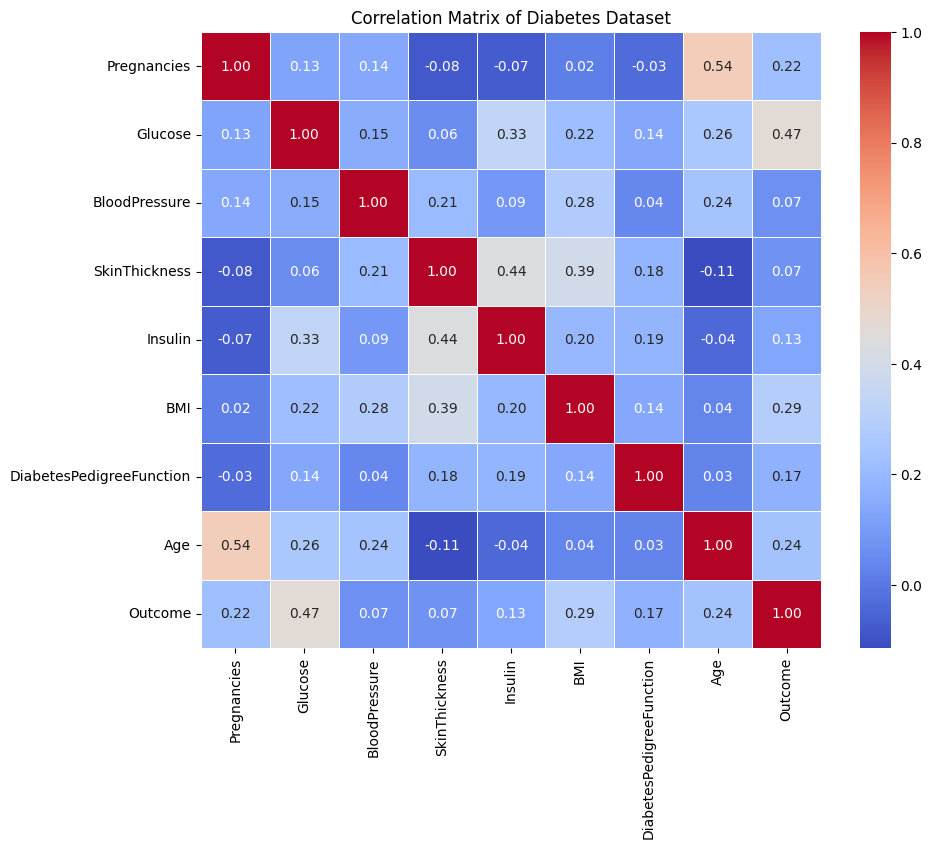

In [60]:
correlation_matrix = df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

### 이상치 확인 및 제거

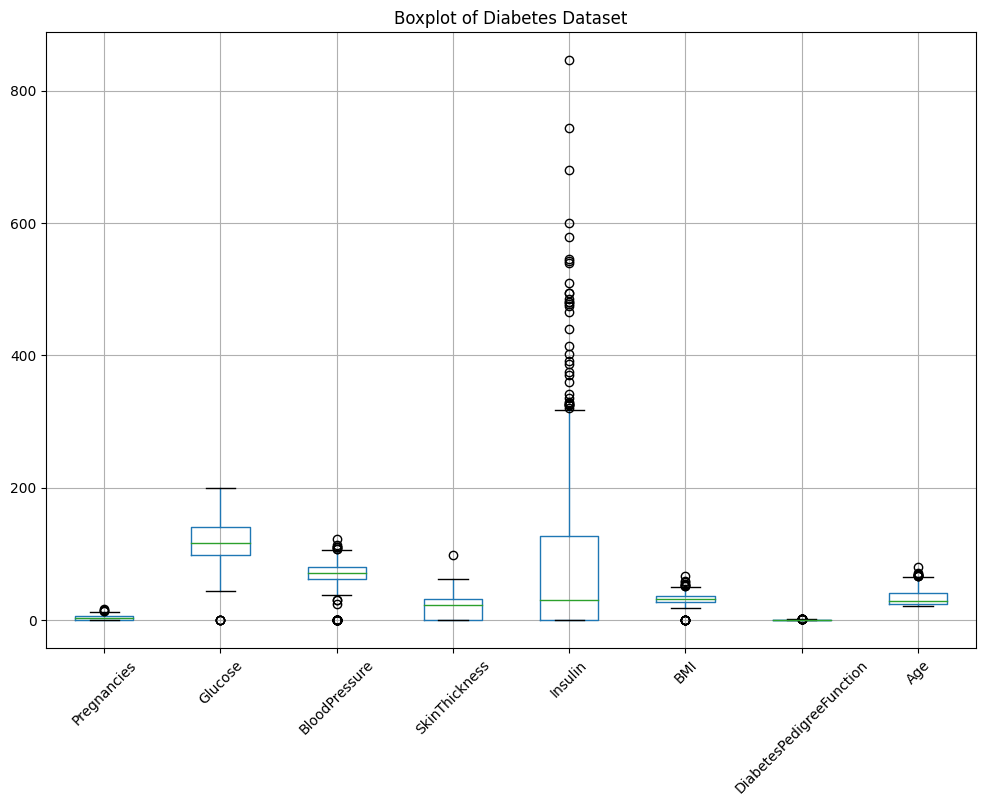

In [61]:
plt.figure(figsize=(12, 8))
df.drop(columns=['Outcome']).boxplot()
plt.title('Boxplot of Diabetes Dataset')
plt.xticks(rotation=45)
plt.show()

In [62]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치의 범위를 벗어난 데이터 제거
    df_out = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# 이상치를 제거할 피쳐들
columns_to_check = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# 이상치 제거
df_no_outliers = remove_outliers_iqr(df, columns_to_check)

# 제거 후 데이터프레임의 크기 확인
df.shape, df_no_outliers.shape

((768, 9), (639, 9))

### 데이터 스케일링

In [63]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected features and transform them
scaled_features = scaler.fit_transform(df_no_outliers.drop(columns=['Outcome']))


# 스케일링된 데이터를 새로운 데이터프레임 df_scaled에 저장
df_scaled = pd.DataFrame(scaled_features, columns=df_no_outliers.drop(columns=['Outcome']).columns)

df_scaled = df_scaled.join(df_no_outliers['Outcome'].reset_index(drop=True))


df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,0
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,0
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,0
...,...,...,...,...,...,...,...,...,...
634,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268,0
635,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184,0
636,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230,0
637,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178,1


### 데이터셋 분할

In [64]:
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. KNN 구현 & 파라미터 튜닝


### KNN 모델

In [65]:
# KNN 모델 구축
knn = KNeighborsClassifier()  # 기본값으로 KNN 모델 생성
knn.fit(X_train, y_train)  # 모델을 훈련 세트에 적합시킴

# 테스트 세트로 예측 수행
y_pred = knn.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
test_accuracy = knn.score(X_test, y_test)

# 결과 출력
print("Accuracy:", accuracy)

Accuracy: 0.8046875


### 거리 측정 방식 조절 및 최고 정확도의 거리 찾기

In [66]:
# 공분산 행렬 (Mahalanobis 거리에 필요)
V = np.cov(X_train, rowvar=False)

# 하이퍼파라미터 그리드 정의
default_knn = KNeighborsClassifier()
default_knn.fit(X_train, y_train)
default_accuracy = default_knn.score(X_test, y_test)

# 하이퍼파라미터 튜닝을 위한 GridSearchCV 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'mahalanobis', 'hamming', 'jaccard'],
    'p': [1, 2],  # 'minkowski' 거리에서 사용할 p 값 (p=1: 맨해튼, p=2: 유클리드)
    'metric_params': [{'V': None} if metric == 'mahalanobis' else None for metric in ['euclidean', 'manhattan', 'minkowski', 'mahalanobis', 'hamming', 'jaccard']]
}

# Mahalanobis 거리를 위한 공분산 행렬 추가
param_grid['metric_params'][param_grid['metric'].index('mahalanobis')] = {'V': np.cov(X_train, rowvar=False)}

# GridSearchCV 실행
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 테스트 세트에서 최적 모델 성능 평가
best_knn = grid_search.best_estimator_
best_accuracy = best_knn.score(X_test, y_test)

print(f"Default KNN Test Set Accuracy: {default_accuracy}")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")
print(f"Best KNN Test Set Accuracy: {best_accuracy}")

Default KNN Test Set Accuracy: 0.8046875
Best parameters: {'metric': 'euclidean', 'metric_params': None, 'n_neighbors': 11, 'p': 1}
Best cross-validation accuracy: 0.7475157053112508
Best KNN Test Set Accuracy: 0.8046875


### Weighted KNN

In [67]:
weighted_knn = KNeighborsClassifier(n_neighbors=13, weights='distance')
weighted_knn.fit(X_train, y_train)

# 테스트 세트에서 성능 평가
y_pred = weighted_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8125

## 4. 평가

하이퍼 파라미터 튜닝 결과 기본값인 euclidean 거리의 정확도가 가장 높았다. 또한 weighted KNN의 정확도가 기본 KNN보다 높음을 확인할 수 있었다.

---
# 2. K-Means 과제

## 1. 데이터 로드

In [68]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

### 데이터 확인

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [70]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


### Label encoding

In [71]:
unique_values_status_type = df['status_type'].unique()

# Print the unique values
print("Unique values in 'status_type' column:")
for value in unique_values_status_type:
    print(value)

Unique values in 'status_type' column:
video
photo
link
status


In [72]:
label_encoder = LabelEncoder()
df['status_type'] = label_encoder.fit_transform(df['status_type'])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,1,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,1,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,1,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [73]:
# 예측에 필요없는 열 제거
df=df.drop(columns=['status_id','status_published'])

### 결측치 확인 및 처리

In [74]:
df.isnull().sum()

,0
status_type,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0


In [75]:
df=df.drop(columns=['Column1', 'Column2', 'Column3','Column4'])

### 상관관계 분석

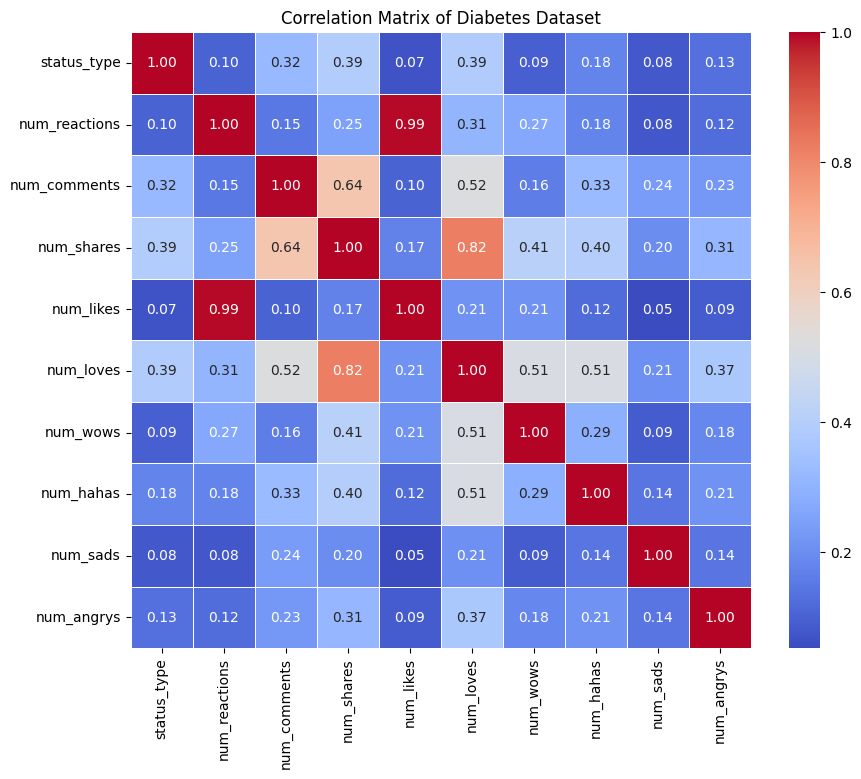

In [76]:
correlation_matrix = df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

### 이상치 확인 및 처리

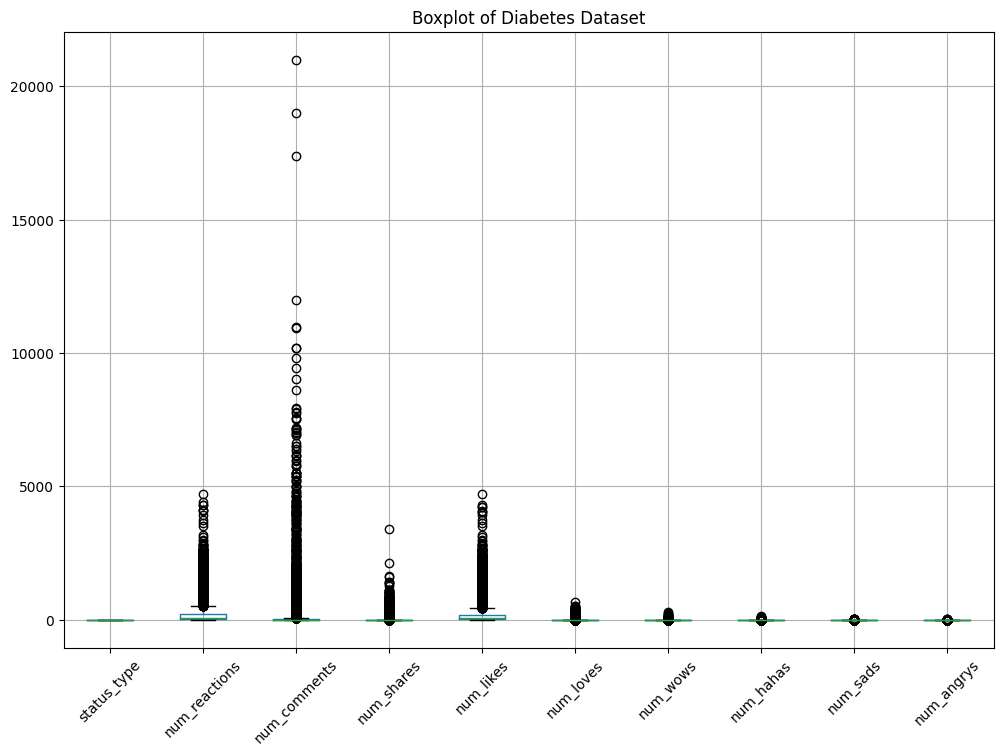

In [77]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot of Diabetes Dataset')
plt.xticks(rotation=45)
plt.show()

In [78]:
columns_to_check = ['num_reactions',	'num_comments',	'num_shares',	'num_likes',	'num_loves']

# 이상치 제거

df_no_outliers = remove_outliers_iqr(df, columns_to_check)

df_no_outliers=df_no_outliers.reset_index(drop=True)


# 제거 후 데이터프레임의 크기 확인
df.shape, df_no_outliers.shape

((7050, 10), (4887, 10))

### scale

In [79]:
scaler = StandardScaler()

# Fit the scaler to the selected features and transform them
scaled_features = scaler.fit_transform(df_no_outliers)


# 스케일링된 데이터를 새로운 데이터프레임 df_scaled에 저장
df_scaled = pd.DataFrame(scaled_features, columns=df_no_outliers.columns)

df_scaled

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,-0.525684,1.077390,-0.577150,-0.415152,1.108111,-0.435396,-0.266545,-0.091835,-0.082364,-0.056504
1,-0.525684,0.604605,-0.577150,-0.415152,0.627685,-0.435396,-0.266545,-0.091835,-0.082364,-0.056504
2,-0.525684,1.889608,0.171697,-0.415152,1.859546,3.486059,0.698349,-0.091835,-0.082364,-0.056504
3,-0.525684,1.719891,-0.452342,-0.415152,1.699404,3.486059,-0.266545,-0.091835,-0.082364,-0.056504
4,-0.525684,1.319843,0.546120,0.266814,1.317527,1.917477,-0.266545,-0.091835,-0.082364,-0.056504
...,...,...,...,...,...,...,...,...,...,...
4882,-0.525684,0.301539,-0.577150,-0.415152,0.319719,-0.435396,-0.266545,-0.091835,-0.082364,-0.056504
4883,-0.525684,0.337907,-0.577150,-0.415152,0.356675,-0.435396,-0.266545,-0.091835,-0.082364,-0.056504
4884,-0.525684,-0.547048,-0.577150,-0.415152,-0.567221,0.348895,-0.266545,1.024582,-0.082364,-0.056504
4885,-0.525684,-0.716766,-0.577150,-0.415152,-0.727363,0.348895,-0.266545,-0.091835,-0.082364,-0.056504


## 3. K-Means 구현 & 파라미터 튜닝

### elbow method로 적절한 k값(cluster 개수) 결정

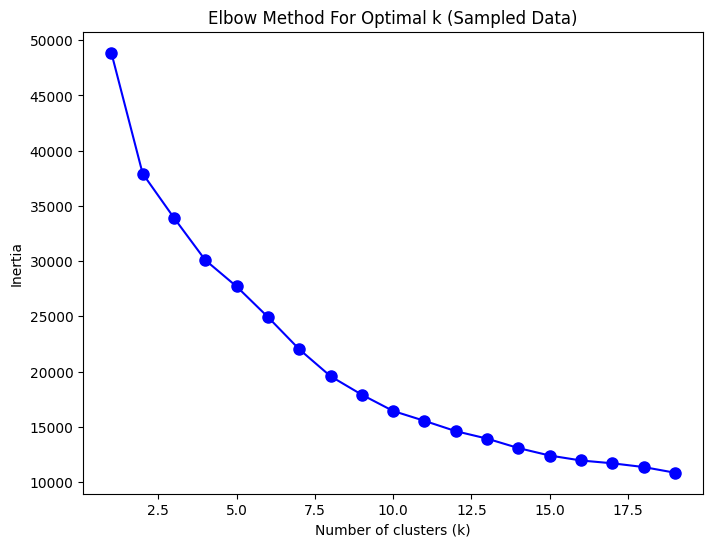

In [80]:
_# Reducing the dataset size for faster computation
# Sampling a subset of the data for the elbow method

data_sampled = df_scaled[:10000]  # Using a subset of the data

# Recalculate inertia for the sampled data
inertia_values_sampled = []

k_values=range(1,20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sampled)
    inertia_values_sampled.append(kmeans.inertia_)

# Plot the elbow graph for the sampled data
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values_sampled, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Sampled Data)')
plt.show()


분석 결과 10이 가장 적절한 값으로 보인다.

### kmeans 수행

In [81]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_scaled)

# Predict the clusters
labels = kmeans.labels_

# Evaluate the model
silhouette_avg = silhouette_score(df_scaled, labels)
inertia = kmeans.inertia_

# Print the evaluation metrics
print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.47087154278175253
Inertia: 16432.699124511677


### manhattan 거리 추가

In [82]:
from sklearn.metrics import pairwise_distances

# Define a function to apply custom distance metric in KMeans
def kmeans_custom_distance(data, n_clusters, distance_metric):
    # Step 1: Run KMeans with Euclidean distance to get initial centroids
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_

    # Step 2: Use custom distance metric to re-assign clusters
    for _ in range(300):  # maximum 300 iterations
        # Compute distances between data points and centroids using the custom distance metric
        distances = pairwise_distances(data, centroids, metric=distance_metric)

        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels

# Define distance metrics to test
distance_metrics = ['euclidean', 'manhattan']

# Dictionary to store silhouette scores
silhouette_scores = {}

# Run KMeans with different distance metrics and calculate silhouette scores
for metric in distance_metrics:
    labels = kmeans_custom_distance(df_scaled, n_clusters=10, distance_metric=metric)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores[metric] = silhouette_avg

# Display the silhouette scores for each distance metric
silhouette_scores

{'euclidean': 0.47117235498830223, 'manhattan': 0.44745642997998797}

### DBSCAN

In [51]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_scaled)

# Evaluate the model
# Only calculate Silhouette Score if more than 1 cluster is found
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(df_scaled, labels_dbscan)
else:
    silhouette_avg_dbscan = -1  # Indicate that Silhouette Score cannot be calculated

# Count the number of clusters found (excluding noise, labeled as -1)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Count the number of noise points (labeled as -1)
n_noise_dbscan = list(labels_dbscan).count(-1)

silhouette_avg_dbscan

0.06795687061234906

### K-mean++

In [83]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(df_scaled)

# Predict cluster labels
labels = kmeans.labels_

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the silhouette score
print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {kmeans.inertia_}')

Silhouette Score: 0.47087154278175253
Inertia: 16432.699124511677


### + 전처리를 거치지 않은 버전

In [84]:
df_special=df.drop(columns=['status_type'])

scaler = StandardScaler()

# Fit the scaler to the selected features and transform them
scaled_features = scaler.fit_transform(df_special)


# 스케일링된 데이터를 새로운 데이터프레임 df_scaled에 저장
df_special = pd.DataFrame(scaled_features, columns=df_special.columns)

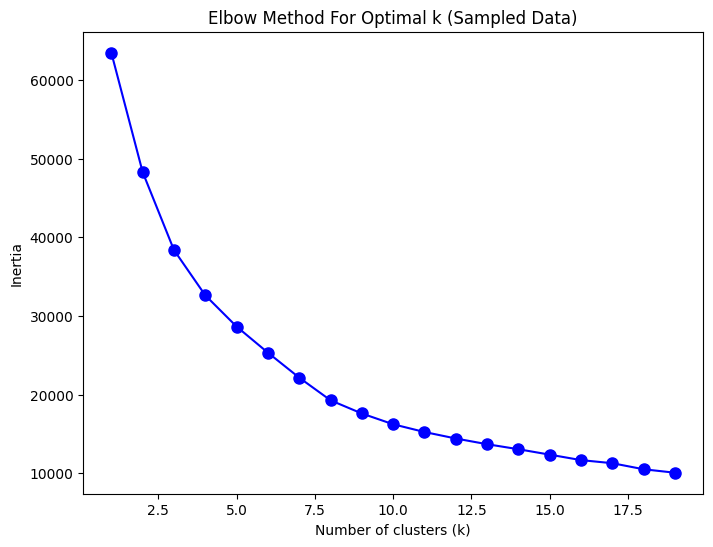

In [85]:
_# Reducing the dataset size for faster computation
# Sampling a subset of the data for the elbow method

data_sampled = df_special[:10000]  # Using a subset of the data

# Recalculate inertia for the sampled data
inertia_values_sampled = []

k_values=range(1,20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sampled)
    inertia_values_sampled.append(kmeans.inertia_)

# Plot the elbow graph for the sampled data
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values_sampled, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (Sampled Data)')
plt.show()


In [86]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(df_special)

# Predict cluster labels
labels = kmeans.labels_

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_special, labels)

# Print the silhouette score
print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {kmeans.inertia_}')

Silhouette Score: 0.7181418523656731
Inertia: 22150.45330597713


## 4. 평가

cluster가 10인 경우의 평가 지표의 값이 가장 크게 나온 것을 알 수 있었다.기본적인 Kmean와 Kmean++, 거리 척도를 변경한 버전 간에 큰 차이는 없었으며 DBSCAN의 결과는 현저히 떨어졌다.

데이터를 전처리하지 않은 버전의 Silhouette Score가 높은 것으로 보아 outlier를 제거하면서 소실된 정보의 양이 결과의 큰 영향을 준 것으로 나타났다. 이를 보완하기 위해 outlier의 제거 기준을 조정하거나 적절한 값으로 대체하는 등의 기법을 사용할 수 있을 것 같다.